In [27]:
# necessary imports

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

## SF data

In [28]:
# Acquire the data

sf_df = data.sf_temps()

In [29]:
# Check out the data

sf_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### 1. Resample by the day and take the average temperature

In [8]:
# Convert to datetime 

sf_df.date = pd.to_datetime(sf_df.date, format='%Y-%m-%d %I-%p')

In [9]:
# Make date the index

sf_df = sf_df.set_index('date').sort_index()

In [10]:
# Resample by day, find the average temp

sf_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


### 2. Write the code necessary to visualize the minimum temperature over time.

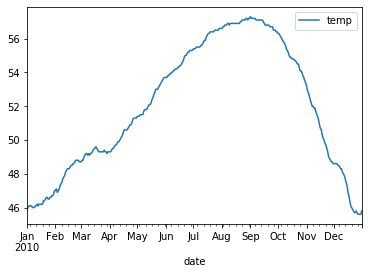

In [16]:
# Plot the min temps

sf_df.resample('D').min().plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

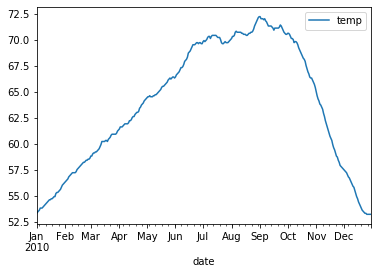

In [17]:
# Plot the max temps

sf_df.resample('D').max().plot()

### 4. Which month is the coldest, on average?

In [23]:
# Resampling by month, sort by the coldest avg

sf_df.resample('M').min().sort_values('temp')

,temp
date,
2010-12-31,45.6
2010-01-31,45.8
2010-02-28,46.9
2010-11-30,48.6
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4
2010-10-31,53.4
2010-06-30,53.7


### 5. Which month has the highest average temperature?

In [26]:
# Sort by the highest avg temps per month

sf_df.resample('M').max().sort_values('temp', ascending=False)

,temp
date,
2010-08-31,72.2
2010-09-30,72.2
2010-10-31,70.6
2010-07-31,70.4
2010-06-30,69.7
2010-05-31,66.4
2010-11-30,65.0
2010-04-30,64.3
2010-03-31,61.3


### 6. Resample by the day and calculate the min and max temp for the day. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

### Seattle data

In [30]:
# import seattle data

sea_df = data.seattle_weather()

In [31]:
sea_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [33]:
# Convert to datetime 

sea_df.date = pd.to_datetime(sea_df.date, format='%Y-%m-%d')

In [34]:
# Make date the index

sea_df = sea_df.set_index('date').sort_index()

In [35]:
sea_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [42]:
# Resample by month, find the highest precipitation 

sea_df.resample('M')[['precipitation']].sum().sort_values('precipitation', ascending=False)

,precipitation
date,
2015-12-31,284.5
2014-03-31,240.0
2015-11-30,212.6
2012-11-30,210.5
2012-03-31,183.0
2012-12-31,174.0
2012-01-31,173.3
2014-10-31,171.5
2012-10-31,170.3


### 2. Visualize the amount of monthly precipitation over time.